In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
for col in df.columns: 
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [5]:
df = df[df.columns.drop(list(df.filter(regex='FLAG_DOCUMENT_')))]


In [6]:
def get_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    percent = round(percent,2)
    missing_df  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print( missing_df.head(102))
    return missing_df

In [7]:
# Pas le même résultat que le 50 % que tu as utilisé ?? J'ai utiliser 40 % pour être sur qu'il y a pas des colonne 
#avec une bonne corrélation qu'on rate. Mais jsp si on va utiliser ça déjà. Je crois que c'est le calcul du percent le pb

missing = get_missing_data(df)
mask50 = missing['Percent']>50
missing = missing[mask50]
missing_l =missing.T.columns
missing_l

                           Total  Percent
COMMONAREA_MEDI           214865    69.87
COMMONAREA_AVG            214865    69.87
COMMONAREA_MODE           214865    69.87
NONLIVINGAPARTMENTS_MODE  213514    69.43
NONLIVINGAPARTMENTS_AVG   213514    69.43
...                          ...      ...
FLAG_PHONE                     0     0.00
FLAG_CONT_MOBILE               0     0.00
FLAG_EMP_PHONE                 0     0.00
FLAG_MOBIL                     0     0.00
SK_ID_CURR                     0     0.00

[102 rows x 2 columns]


Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI',
       'FLOORSMIN_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MEDI', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG',
       'ENTRANCES_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE'],
      dtype='object')

In [8]:
no_missing = df.isnull().sum() == 0
no_missing = no_missing.to_frame()
no_missing = no_missing[no_missing == True]
no_missing = no_missing.dropna()
no_missing = no_missing.T.columns

full = missing_l.append(no_missing)

In [9]:
df = df[full]

In [10]:
'''
#over 50% of missing data we clean it, can't be used 
df = df[df.columns.drop(list(df.filter(regex='APARTMENTS_')))]
df = df[df.columns.drop(list(df.filter(regex='WALLSMATERIAL_')))]
df = df[df.columns.drop(list(df.filter(regex='ELEVATORS_')))]
df = df[df.columns.drop(list(df.filter(regex='NONLIVINGAREA_')))]
df = df[df.columns.drop(list(df.filter(regex='ENTRANCES_')))]
df = df[df.columns.drop(list(df.filter(regex='FLOORSMIN_')))]
df = df[df.columns.drop(list(df.filter(regex='YEARS_BUILD_')))]
df = df[df.columns.drop(list(df.filter(regex='FONDKAPREMONT_')))]
df = df[df.columns.drop(list(df.filter(regex='OWN_CAR_AGE')))]
df = df[df.columns.drop(list(df.filter(regex='HOUSETYPE_MODE ')))]
df = df[df.columns.drop(list(df.filter(regex='EXT_SOURCE_1')))]
df = df[df.columns.drop(list(df.filter(regex='HOUSETYPE_MODE')))]
'''

"\n#over 50% of missing data we clean it, can't be used \ndf = df[df.columns.drop(list(df.filter(regex='APARTMENTS_')))]\ndf = df[df.columns.drop(list(df.filter(regex='WALLSMATERIAL_')))]\ndf = df[df.columns.drop(list(df.filter(regex='ELEVATORS_')))]\ndf = df[df.columns.drop(list(df.filter(regex='NONLIVINGAREA_')))]\ndf = df[df.columns.drop(list(df.filter(regex='ENTRANCES_')))]\ndf = df[df.columns.drop(list(df.filter(regex='FLOORSMIN_')))]\ndf = df[df.columns.drop(list(df.filter(regex='YEARS_BUILD_')))]\ndf = df[df.columns.drop(list(df.filter(regex='FONDKAPREMONT_')))]\ndf = df[df.columns.drop(list(df.filter(regex='OWN_CAR_AGE')))]\ndf = df[df.columns.drop(list(df.filter(regex='HOUSETYPE_MODE ')))]\ndf = df[df.columns.drop(list(df.filter(regex='EXT_SOURCE_1')))]\ndf = df[df.columns.drop(list(df.filter(regex='HOUSETYPE_MODE')))]\n"

In [11]:
df

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,0.0144,0.0143,0.0144,0.0,0.0000,0.0000,reg oper account,0.0205,0.0202,0.0220,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,0.0608,0.0605,0.0497,0.0,0.0039,0.0039,reg oper account,0.0787,0.0773,0.0790,...,1,MONDAY,11,0,0,0,0,0,0,School
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,MONDAY,9,0,0,0,0,0,0,Government
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,THURSDAY,11,0,0,0,0,1,1,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0203,0.0202,0.0172,0.0,0.0753,0.0757,reg oper account,0.1509,0.1484,0.0882,...,1,THURSDAY,15,0,0,0,0,0,0,Services
307507,0.0022,0.0022,0.0022,0.0,0.0000,0.0000,reg oper account,0.0205,0.0202,0.0220,...,2,MONDAY,8,0,0,0,0,0,0,XNA
307508,0.0124,0.0123,0.0124,0.0,0.0000,0.0000,reg oper account,0.0855,0.0841,0.0918,...,3,THURSDAY,9,0,0,0,0,1,1,School
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1


In [12]:
correlations = df.corr()['TARGET'].sort_values()

In [13]:
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations:
 REG_REGION_NOT_LIVE_REGION     0.005576
REG_REGION_NOT_WORK_REGION     0.006942
CNT_CHILDREN                   0.019187
FLAG_WORK_PHONE                0.028524
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997


In [14]:
correlations = correlations.sort_values(ascending = False)
correlations = correlations.to_frame()
mask_onepercent = correlations['TARGET'] > 0.01
correlations = correlations[mask_onepercent == True]
correlations = correlations.T.columns

In [15]:
correlations

Index(['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
       'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'DAYS_REGISTRATION',
       'OWN_CAR_AGE', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_WORK_PHONE',
       'CNT_CHILDREN'],
      dtype='object')

In [16]:
#Let's use the 10 features that has the most correlation with the target 

df1 = df[correlations]

In [17]:
df1.head()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,REG_CITY_NOT_LIVE_CITY,DAYS_REGISTRATION,OWN_CAR_AGE,LIVE_CITY_NOT_WORK_CITY,FLAG_WORK_PHONE,CNT_CHILDREN
0,1,-9461,2,2,-2120,0,1,0,-3648.0,NaN,0,0,0
1,0,-16765,1,1,-291,0,1,0,-1186.0,NaN,0,0,0
2,0,-19046,2,2,-2531,0,1,0,-4260.0,26.0,0,1,0
3,0,-19005,2,2,-2437,0,1,0,-9833.0,NaN,0,0,0
4,0,-19932,2,2,-3458,1,1,0,-4311.0,NaN,1,0,0


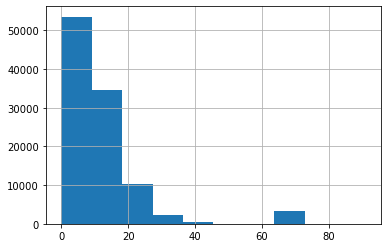

In [18]:
#Looks Like OWN car age has a lot of NAN value, but since it has a little bit of impact, we keep it and try to 
#remove the NaN
df1.OWN_CAR_AGE.hist()

In [19]:
#Most of the car has value between 0 and 20, we will use the median since there are some value that are really far
df1.OWN_CAR_AGE.median()

9.0

In [20]:
#9 seems to be a great number, too put our missing user in it
df1.OWN_CAR_AGE.fillna(9.0,inplace= True)

/home/leo/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
#We now have cleaned data let's try to train our models : Xgboost, Random Forest and Gradient Boosting

In [22]:
import mlflow
import mlflow.sklearn

In [23]:

#Prepare data
X = df1.iloc[:, 1:13]
y = df1.iloc[:, 0]


In [24]:
df2 = pd.read_csv("application_test.csv")

mask = df1.drop(columns='TARGET')
mask = mask.columns
X_test = df2[mask]
X_test.OWN_CAR_AGE.median()

9.0

In [25]:
X_test.OWN_CAR_AGE.fillna(9.0, inplace = True)

/home/leo/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:

#feature scaling 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.fit_transform(X_test)

In [ ]:
import xgboost as xgb


dmatrix = xgb.DMatrix(data=X,label=y)
xclf = xgb.XGBClassifier()
xclf.fit(X, y)
pred = xclf.predict(X)
y_test = xclf.predict(X_test)


In [ ]:
def metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [ ]:
pred = pred[:48744]

In [ ]:
metrics(y_test,pred)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X,y)
pred = clf.predict(X)
y_test = clf.predict(X_test)

In [ ]:
metrics(y_test,pred)

In [ ]:
with mlflow.start_run():
        # Execute ElasticNet
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)

        # Evaluate Metrics
        predicted_qualities = lr.predict(test_x)
        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

        # Print out metrics
        print("Elasticnet model (alpha=%f, l1_ratio=%f):" % (alpha, l1_ratio))
        print("  RMSE: %s" % rmse)
        print("  MAE: %s" % mae)
        print("  R2: %s" % r2)

        # Log parameter, metrics, and model to MLflow
        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        mlflow.sklearn.log_model(lr, "model")